# Regresión lineal simple en Python

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Análisis exploratorio

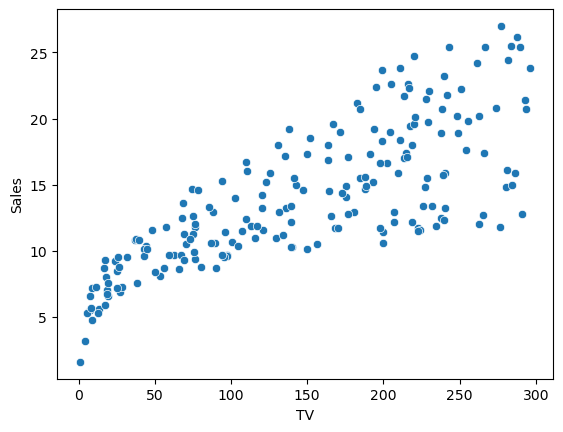

In [43]:
sns.scatterplot(x= data.TV, y = data.Sales)
plt.show()

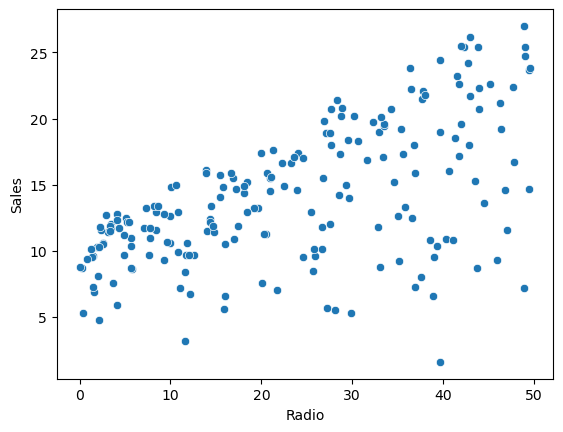

In [44]:
sns.scatterplot(x= data.Radio, y = data.Sales)
plt.show()

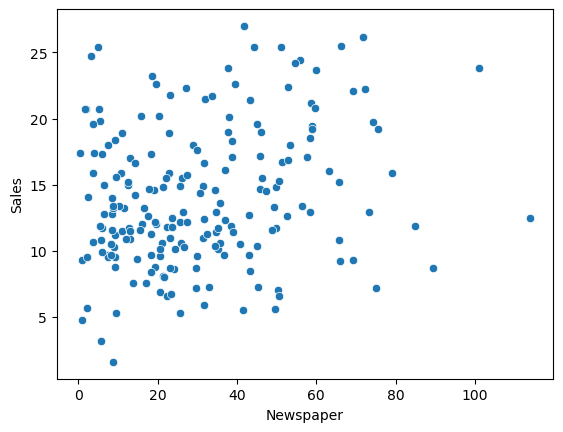

In [45]:
sns.scatterplot(x= data.Newspaper, y = data.Sales)
plt.show()

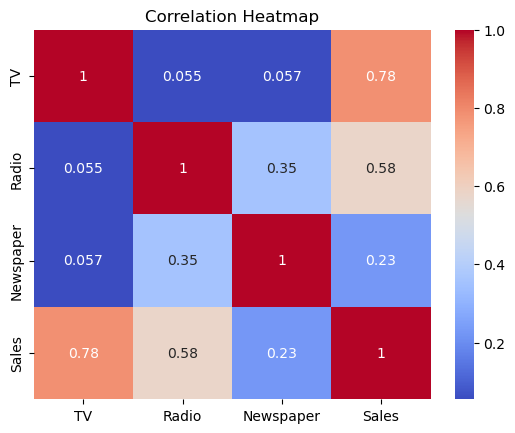

<Figure size 1600x1000 with 0 Axes>

In [52]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.figure(figsize=(16, 10))
plt.show()

## Análisis predictivo
El paquete statsmodel para regresión lineal

Vamos a probar estimar las ventas con TV ya que es la que más está correlacionada con la columna Sales.

In [4]:
import statsmodels.formula.api as smf

In [54]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [55]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería

Sales = 7.032594 + 0.047537 * TV

In [56]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [57]:
lm.rsquared

0.611875050850071

In [70]:
# Podemos ver que el coeficiente de correlación entre las ventas y TV es de 0.78
# Si elevamos este número al cuadrado obtenemos el R^2

print(correlation_matrix.iloc[3,0]**2)
print(lm.rsquared)

0.6118750508500714
0.611875050850071


In [58]:
lm.rsquared_adj

0.6099148238341623

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.47e-42
Time:                        23:19:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
data["Sales_pred"] = lm.predict(data["TV"])
data.head(8)

,TV,Radio,Newspaper,Sales,Sales_pred_artesanal,Sales_pred
0,230.1,37.8,69.2,22.1,1.406334e-35,17.970775
1,44.5,39.3,45.1,10.4,1.406307e-35,9.147974
2,17.2,45.9,69.3,9.3,1.406303e-35,7.850224
3,151.5,41.3,58.5,18.5,1.406323e-35,14.234395
4,180.8,10.8,58.4,12.9,1.406327e-35,15.627218
5,8.7,48.9,75.0,7.2,1.406302e-35,7.446162
6,57.5,32.8,23.5,11.8,1.406309e-35,9.765950
7,120.2,19.6,11.6,13.2,1.406318e-35,12.746498


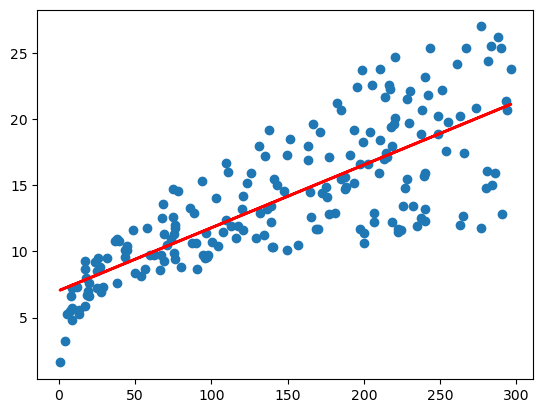

In [61]:
plt.scatter(x = data["TV"], y =data["Sales"])

plt.plot(data["TV"], data["Sales_pred"], c="red", linewidth = 2)

In [64]:
b0 = lm.params.iloc[0]
b1 = lm.params.iloc[1]

data["Sales_pred_artesanal"] = b0 + b1 *data["TV"]
data.head(5)

,TV,Radio,Newspaper,Sales,Sales_pred_artesanal,Sales_pred
0,230.1,37.8,69.2,22.1,17.970775,17.970775
1,44.5,39.3,45.1,10.4,9.147974,9.147974
2,17.2,45.9,69.3,9.3,7.850224,7.850224
3,151.5,41.3,58.5,18.5,14.234395,14.234395
4,180.8,10.8,58.4,12.9,15.627218,15.627218


In [26]:
data["error_cuadratico"] = (data["Sales"]-data["Sales_pred_artesanal"])**2
data.head(5)

,TV,Radio,Newspaper,Sales,Sales_pred,Sales_pred_artesanal,error_cuadratico
0,230.1,37.8,69.2,22.1,17.970775,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147974,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850224,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234395,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627218,15.627284,7.438076


In [82]:
Suma_error_cuadratico = sum(data["error_cuadratico"])
Suma_error_cuadratico 

1918.5618118968264

In [83]:
Error_cuadratico_medio = Suma_error_cuadratico/(len(data)-2) # el menos 2 es una cuestión estadística para que sea un "estimador insesgado"
                                                             # es decir, para que sea comparable con otros modelos con más variables y no solo TV
Error_cuadratico_medio

9.689706120691042

In [84]:
error_estandar = np.sqrt(Error_cuadratico_medio)
error_estandar

3.1128292790789285

In [66]:
sales_m = np.mean(data["Sales"])

In [67]:
sales_m

14.0225

In [85]:
# Conceptualmente, el error promedio porcentual se podría calcular como el error_estandar sobre las ventas promedio
error = error_estandar / sales_m 

print(f"El error promedio es de un {round(error*100)}%")

El error promedio es de un 22%


## **Resolver Ejercicios antes de pasar a múltiple**

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [72]:
data = pd.read_csv("Advertising.csv")

### Modelo con Newspaper

In [73]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [74]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [75]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948+0.046901*TV + 0.044219*Newspaper

In [76]:
lm2.rsquared

0.6458354938293271

In [77]:
lm2.rsquared_adj

0.6422399150864777

In [79]:
data["sales_pred"] = lm2.predict(data[["TV", "Newspaper"]])
data.head()

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,19.626901
1,44.5,39.3,45.1,10.4,9.856348
2,17.2,45.9,69.3,9.3,9.646055
3,151.5,41.3,58.5,18.5,15.467318
4,180.8,10.8,58.4,12.9,16.837102


In [81]:
data["error_cuadratico"] = (data["Sales"]-data["sales_pred"])**2
Suma_error_cuadratico = sum(data["error_cuadratico"])
Suma_error_cuadratico 

1918.5618118968264

In [87]:
error_estandar = np.sqrt(Suma_error_cuadratico/(len(data)-2-1)) # se resta -2 por las 2 variables del modelo y a eso se le resta 1
error_estandar

3.1207198602528847

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           3.95e-45
Time:                        16:00:22   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo con Radio

In [88]:
#Añadir la Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [89]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.83e-98
Time:                        23:53:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
data["sales_pred"] = lm3.predict(data[["TV", "Radio"]])
Suma_error_cuadrático = sum((data["Sales"]-data["sales_pred"])**2)
error_standar = np.sqrt(Suma_error_cuadrático/(len(data)-2-1))
error_standar

1.681360912508001

### Modelo con Newspaper y Radio

In [91]:
#Añadir la Radio al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [92]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.58e-96
Time:                        23:55:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
data["sales_pred"] = lm3.predict(data[["TV", "Radio","Newspaper"]])
Suma_error_cuadrático = sum((data["Sales"]-data["sales_pred"])**2)
error_standar = np.sqrt(Suma_error_cuadrático/(len(data)-2-1))
error_standar

1.681360912508001

### Conclusion

In [102]:
print(f"El R^2 del modelo con Newspaper fue de {lm2.rsquared}")
print(f"El R^2 del modelo con Radio fue de {lm3.rsquared}")
print(f"El R^2 del modelo con Newspaper y Radio fue de {lm4.rsquared}")

El R^2 del modelo con Newspaper fue de 0.6458354938293271
El R^2 del modelo con Radio fue de 0.8971942610828956
El R^2 del modelo con Newspaper y Radio fue de 0.8972106381789522


In [100]:
print(f"El R^2 ajustado del modelo con Newspaper fue de {lm2.rsquared_adj,3}")
print(f"El R^2 ajustado del modelo con Radio fue de {lm3.rsquared_adj}")
print(f"El R^2 ajustado del modelo con Newspaper y Radio fue de {lm4.rsquared_adj}")

El R^2 ajustado del modelo con Newspaper fue de (0.6422399150864777, 3)
El R^2 ajustado del modelo con Radio fue de 0.8961505479974428
El R^2 ajustado del modelo con Newspaper y Radio fue de 0.8956373316204668


**NOTA: parece que subió el R^2, pero en realidad bajó el R^2 ajustado al agregar otra variable en el último modelo**

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [103]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [104]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [105]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353